In [1]:
import numpy as np # Import numpy with the alias np
import pandas as pd # Import pandas with the alias pd
import matplotlib.pyplot as plt # Import matplotlib.pyplot with the alias plt
from matplotlib.dates import DateFormatter # importing DateFormatter from matplotlib.dates
pd.pandas.set_option('display.max_rows',None) # used for expanding the no of viible rows of dataset
import seaborn as sns # Import seaborn with the alias sns
from sklearn import preprocessing # importing preprocessing from sklearn
import mplfinance as mpf # Import mplfinance with the alias mpf

In [2]:
data = pd.read_csv('C:/Users/SOUVIK/Downloads/dataset_new.csv') # for reading a dataset in specified location
data.head() # to show the top 5 rows of the dataset

,DATE,TIME,DESCRIPTION,BPM,SPO2
0,2022-08-05,03:27:18,Heart Rate & SpO2,97.86,93
1,2022-08-05,03:27:21,Heart Rate & SpO2,93.02,94
2,2022-08-05,03:27:22,Heart Rate & SpO2,72.94,94
3,2022-08-05,03:27:23,Heart Rate & SpO2,123.37,94
4,2022-08-05,03:27:24,Heart Rate & SpO2,168.67,94


In [3]:
data['TIME'] = data['DATE'] + ' ' + data['TIME'] # to break the time into date and time

In [4]:
data.head() # to show the top 5 rows of the dataset

,DATE,TIME,DESCRIPTION,BPM,SPO2
0,2022-08-05,2022-08-05 03:27:18,Heart Rate & SpO2,97.86,93
1,2022-08-05,2022-08-05 03:27:21,Heart Rate & SpO2,93.02,94
2,2022-08-05,2022-08-05 03:27:22,Heart Rate & SpO2,72.94,94
3,2022-08-05,2022-08-05 03:27:23,Heart Rate & SpO2,123.37,94
4,2022-08-05,2022-08-05 03:27:24,Heart Rate & SpO2,168.67,94


In [5]:
data.columns = ['DATE','TIME','DESCRIPTION','BPM','SPO2'] # to show only the specified columns
data.head() # to show the top 5 rows of the dataset

,DATE,TIME,DESCRIPTION,BPM,SPO2
0,2022-08-05,2022-08-05 03:27:18,Heart Rate & SpO2,97.86,93
1,2022-08-05,2022-08-05 03:27:21,Heart Rate & SpO2,93.02,94
2,2022-08-05,2022-08-05 03:27:22,Heart Rate & SpO2,72.94,94
3,2022-08-05,2022-08-05 03:27:23,Heart Rate & SpO2,123.37,94
4,2022-08-05,2022-08-05 03:27:24,Heart Rate & SpO2,168.67,94


In [6]:
data.drop(['DESCRIPTION','DATE'],axis=1,inplace=True) # to drop labels from the columns and to do the operation inplace and return None
data.head() # to show the top 5 rows of the dataset

,TIME,BPM,SPO2
0,2022-08-05 03:27:18,97.86,93
1,2022-08-05 03:27:21,93.02,94
2,2022-08-05 03:27:22,72.94,94
3,2022-08-05 03:27:23,123.37,94
4,2022-08-05 03:27:24,168.67,94


In [7]:
import re # importing regular expression
def clean_time(text):
    # 1. Make a space
    review = re.sub('[^a-zA-Z0-9-.:]',' ', text)
    return (review)

data['TIME'] = data['TIME'].apply(lambda x: clean_time(x))
data.head() # to show the top 5 rows of the dataframe

,TIME,BPM,SPO2
0,2022-08-05 03:27:18,97.86,93
1,2022-08-05 03:27:21,93.02,94
2,2022-08-05 03:27:22,72.94,94
3,2022-08-05 03:27:23,123.37,94
4,2022-08-05 03:27:24,168.67,94


In [8]:
data_copy = data.copy() # to return a copy of the Dataset

In [9]:
data['TIME'] = pd.to_datetime(data['TIME']) 
data['MINUTE'] = data['TIME'].dt.minute # returns minute in a separate column
data['HOUR'] = data['TIME'].dt.hour # returns hour in a separate column
data['SECOND'] = data['TIME'].dt.second # returns second in a separate column
data.head(10) # to show the top 10 rows of the dataset

,TIME,BPM,SPO2,MINUTE,HOUR,SECOND
0,2022-08-05 03:27:18,97.86,93,27,3,18
1,2022-08-05 03:27:21,93.02,94,27,3,21
2,2022-08-05 03:27:22,72.94,94,27,3,22
3,2022-08-05 03:27:23,123.37,94,27,3,23
4,2022-08-05 03:27:24,168.67,94,27,3,24
5,2022-08-05 03:27:25,105.15,94,27,3,25
6,2022-08-05 03:27:26,97.33,94,27,3,26
7,2022-08-05 03:27:27,94.55,33,27,3,27
8,2022-08-05 03:27:28,94.34,33,27,3,28
9,2022-08-05 03:27:29,84.95,94,27,3,29


In [10]:
data.shape # returns the number of rows and columns of the modified dataset

(3703, 6)

In [11]:
data['SPO2'] = data['SPO2'].astype('float64') # sets the datatype to float
data.info() # returns detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TIME    3703 non-null   datetime64[ns]
 1   BPM     3703 non-null   float64       
 2   SPO2    3703 non-null   float64       
 3   MINUTE  3703 non-null   int64         
 4   HOUR    3703 non-null   int64         
 5   SECOND  3703 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 173.7 KB


Text(0, 0.5, '<----------------Heart Beat---------------->')

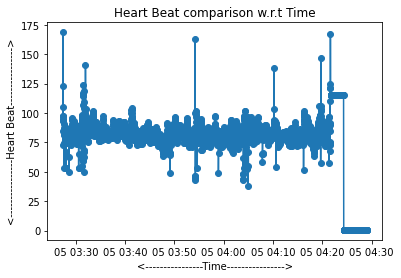

In [12]:
plt.plot_date(data['TIME'], data['BPM'], linestyle='solid') # to plot 'TIME' and 'BPM' where the linestyle is solid
plt.title('Heart Beat comparison w.r.t Time') # title of the plot
plt.xlabel('<----------------Time---------------->') # to specify the x-axis of the plot
plt.ylabel('<----------------Heart Beat---------------->') # to specify the y-axis of the plot

Text(0, 0.5, '<----------------SPO2---------------->')

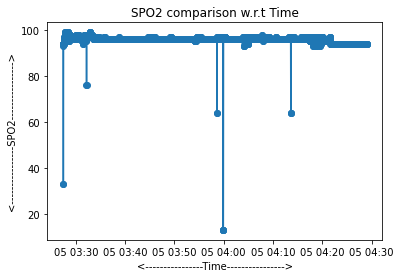

In [13]:
plt.plot_date(data['TIME'], data['SPO2'], linestyle='solid') # to plot 'TIME' and 'SPO2' where the linestyle is solid
plt.title('SPO2 comparison w.r.t Time') # title of the plot
plt.xlabel('<----------------Time---------------->') # to specify the x-axis of the plot
plt.ylabel('<----------------SPO2---------------->') # to specify the y-axis of the plot

C:\Users\SOUVIK\AppData\Local\Temp/ipykernel_11744/1269191312.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(data['TIME'], data['SPO2'], linestyle='solid', marker = '')


Text(0, 0.5, '<----------------SPO2---------------->')

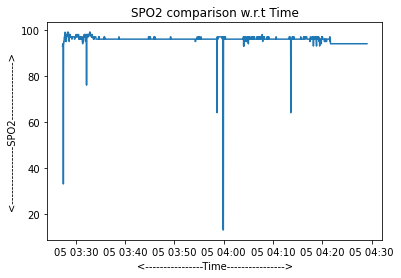

In [14]:
plt.plot_date(data['TIME'], data['SPO2'], linestyle='solid', marker = '')  # to plot 'TIME' and 'SPO2' where the linestyle is solid and plots as markers
plt.title('SPO2 comparison w.r.t Time') # title of the plot
plt.xlabel('<----------------Time---------------->') # to specify the x-axis of the plot
plt.ylabel('<----------------SPO2---------------->') # to specify the y-axis of the plot

In [15]:
data_length = len(data['MINUTE'])-1

In [16]:
#New Time

i=0
time = []

while(i<data_length):
    a=data['MINUTE'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['MINUTE'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    time.append(data_copy['TIME'][j-1])
    i=i+count

In [17]:
#New Hour

i=0
hour = []

while(i<data_length):
    a=data['MINUTE'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['MINUTE'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    hour.append(data['HOUR'][j-1])
    i=i+count

In [18]:
#New Minute

i=0
minute = []

while(i<data_length):
    a=data['MINUTE'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['MINUTE'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    minute.append(data['MINUTE'][j-1])
    i=i+count

In [19]:
#New Second

i=0
second = []

while(i<data_length):
    a=data['MINUTE'][i]
    j=i
    count = 0
    s = 0
    mean = 0
    while(j<data_length):
        if(a == data['MINUTE'][j]): 
            count = count + 1
            j=j+1
        else:
            break
    
    second.append(data['SECOND'][j-1])
    i=i+count

In [20]:
print(len(time))
print(len(hour))
print(len(minute))
print(len(second))

63
63
63
63


In [21]:
def mean(data,feature):
    i=0
    spo2_mean=[]
    while(i<data_length):
        a=data['MINUTE'][i]
        j=i
        count = 0
        s = 0
        mean = 0
        while(j<data_length):
            if(a == data['MINUTE'][j]):
                s = data[feature][j] + s
                count = count + 1
                #spo2_mean = (s/count).astype(int)
                #spo2_mean.append(s/count)
                j=j+1
            else:
                break
                
        mean = round(s/count,2)
        spo2_mean.append(mean)
        i=i+count
    return(spo2_mean)
#spo2_mean

In [22]:
data_new = pd.DataFrame()

data_new =pd.DataFrame({'Time' : time,
                        'Hour' : hour,
                        'Minute' : minute,
                        'Second' : second })
data_new.head()

,Time,Hour,Minute,Second
0,2022-08-05 03:27:59,3,27,59
1,2022-08-05 03:28:59,3,28,59
2,2022-08-05 03:29:59,3,29,59
3,2022-08-05 03:30:59,3,30,59
4,2022-08-05 03:31:59,3,31,59


In [23]:
for feature in ['BPM','SPO2']:
    xy = mean(data,feature)
    mn = pd.DataFrame(xy)
    data_new = pd.concat([data_new,mn],axis=1)
    
    
data_new.columns = ['Time','Hour','Minute','Second','BPM_mean','SPO2_mean']
data_new.head()

,Time,Hour,Minute,Second,BPM_mean,SPO2_mean
0,2022-08-05 03:27:59,3,27,59,86.98,92.68
1,2022-08-05 03:28:59,3,28,59,78.05,97.32
2,2022-08-05 03:29:59,3,29,59,84.05,96.83
3,2022-08-05 03:30:59,3,30,59,80.54,97.05
4,2022-08-05 03:31:59,3,31,59,87.46,96.55


In [24]:
data_new.loc[(data_new['BPM_mean'] == 0.00), 'Condition'] = 'Dead' 

data_new.loc[((data_new['BPM_mean'] < 60)|(data_new['BPM_mean'] > 100)) | 
             ((data_new['SPO2_mean'] < 94)|(data_new['SPO2_mean'] > 100)), 'Condition'] = 'Critical'

data_new.loc[((data_new['BPM_mean'] >= 60)&(data_new['BPM_mean'] <= 100)) & 
             ((data_new['SPO2_mean'] >= 94)&(data_new['SPO2_mean'] <= 99)), 'Condition'] = 'Normal' 

data_new.head()

,Time,Hour,Minute,Second,BPM_mean,SPO2_mean,Condition
0,2022-08-05 03:27:59,3,27,59,86.98,92.68,Critical
1,2022-08-05 03:28:59,3,28,59,78.05,97.32,Normal
2,2022-08-05 03:29:59,3,29,59,84.05,96.83,Normal
3,2022-08-05 03:30:59,3,30,59,80.54,97.05,Normal
4,2022-08-05 03:31:59,3,31,59,87.46,96.55,Normal


In [25]:
data_new.to_csv('PPG_work.csv')

In [26]:
data_new = pd.read_csv('C:/Users/SOUVIK/Downloads/PPG_work.csv')
data_new.drop('Unnamed: 0',axis=1,inplace=True)

data_new['Time'] = pd.to_datetime(data_new['Time'])

Text(0.5, 1.0, 'Count of number of Target Feature')

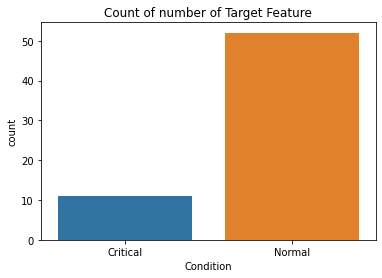

In [27]:
sns.countplot(x = data_new['Condition'])
plt.title('Count of number of Target Feature')

Text(0.5, 1.0, 'Percentge share of Target Feature')

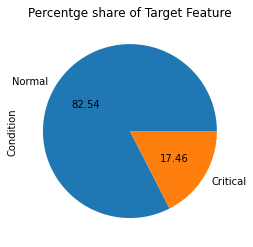

In [28]:
data_new['Condition'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Percentge share of Target Feature')

<AxesSubplot:xlabel='Time', ylabel='BPM_mean'>

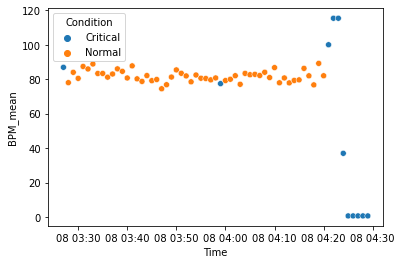

In [29]:
sns.scatterplot(x = data_new['Time'], y = data_new['BPM_mean'],hue = data_new['Condition'])

<AxesSubplot:xlabel='Time', ylabel='SPO2_mean'>

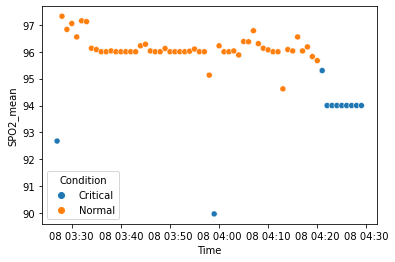

In [30]:
sns.scatterplot(x = data_new['Time'], y = data_new['SPO2_mean'],hue = data_new['Condition'])

In [31]:
le=preprocessing.LabelEncoder()
le.fit(['Critical','Normal'])
y=pd.DataFrame()
data_new['Condition'] = le.transform(data_new['Condition'])

data_new.head()

,Time,Hour,Minute,Second,BPM_mean,SPO2_mean,Condition
0,2022-05-08 03:27:00,3,27,59,86.98,92.68,0
1,2022-05-08 03:28:00,3,28,59,78.05,97.32,1
2,2022-05-08 03:29:00,3,29,59,84.05,96.83,1
3,2022-05-08 03:30:00,3,30,59,80.54,97.05,1
4,2022-05-08 03:31:00,3,31,59,87.46,96.55,1


<AxesSubplot:>

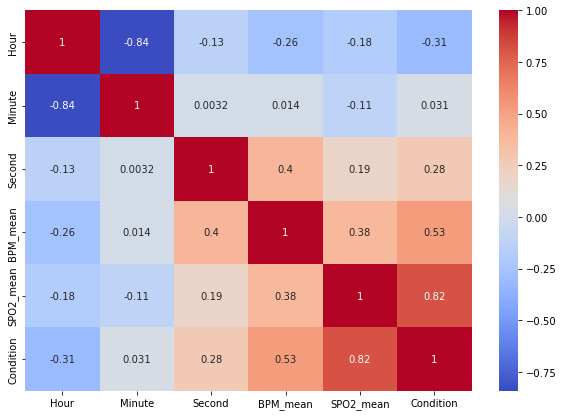

In [32]:
corr = data_new.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [33]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       63 non-null     datetime64[ns]
 1   Hour       63 non-null     int64         
 2   Minute     63 non-null     int64         
 3   Second     63 non-null     int64         
 4   BPM_mean   63 non-null     float64       
 5   SPO2_mean  63 non-null     float64       
 6   Condition  63 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 3.3 KB


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [35]:
x = data_new[['Hour','Minute','Second','BPM_mean','SPO2_mean']]

y = data_new['Condition']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

print('Tota train rows {}'.format(len(x_train)))
print('Tota test rows {}'.format(len(x_test)))

Tota train rows 50
Tota test rows 13


In [37]:
# Training model using Decision Tree Classifier

def training_model():
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(random_state=42)
    classifier.fit(x_train, y_train)
    return classifier

In [38]:
model = training_model()

In [39]:
#Visualizing the performace of the model
y_pred_train = model.predict(x_train)

#Printing the classification_report
print(classification_report(y_train, y_pred_train,
                            target_names = ['Critical','Normal']))

#Printing the confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_train , y_train)
acc_score = acc_score*100
print('\nAccuracy of train set {}%'.format(acc_score))

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00         6
      Normal       1.00      1.00      1.00        44

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

[[ 6  0]
 [ 0 44]]

Accuracy of train set 100.0%


In [40]:
#Visualizing the performace of the model
y_pred_test = model.predict(x_test)

#Printing the classification_report
print(classification_report(y_test, y_pred_test,
                            target_names = ['Critical','Normal']))

#Printing the confusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
print(cm)

#Printing the accuracy score
acc_score = accuracy_score(y_pred_test , y_test)
acc_score = acc_score*100
print('\nAccuracy of test set {}%'.format(acc_score))

              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00         5
      Normal       1.00      1.00      1.00         8

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

[[5 0]
 [0 8]]

Accuracy of test set 100.0%


In [41]:
x.head()

,Hour,Minute,Second,BPM_mean,SPO2_mean
0,3,27,59,86.98,92.68
1,3,28,59,78.05,97.32
2,3,29,59,84.05,96.83
3,3,30,59,80.54,97.05
4,3,31,59,87.46,96.55


In [42]:
def check_data():
    hour = int(input('Enter the current hour : '))
    minute = int(input('Enter the current minute : '))
    second = int(input('Enter the current second : '))
    bpm_mean = float(input('What is your current BPM : '))
    spo2_mean = float(input('What is your current SPO2 : '))
    d = [[hour,minute,second,bpm_mean,spo2_mean]]
    pd.DataFrame(d)
    prediction = model.predict(d)
    normal = 'Your health condition is normal'
    critical = 'Your health condition is critical'
    
    if prediction == 0:
            return critical
    elif prediction == 1:
            return normal

In [43]:
check_data()

Enter the current hour : 12
Enter the current minute : 23
Enter the current second : 21
What is your current BPM : 56
What is your current SPO2 : 36


'Your health condition is critical'